In [29]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import fid_decomp

In [30]:
with open('../track_coverage.json') as user_file:
  coverage_file = json.load(user_file)
print(coverage_file.keys())
print(len(coverage_file['crs']))
print(len(coverage_file['features']))
print(len(coverage_file['name']))
print(len(coverage_file['type']))
num_scenes = len(coverage_file['features'])

dict_keys(['crs', 'features', 'name', 'type'])
2
34001
11
17


count_wv_range = 0
count_wv_med = 0
count_elev_med = 0
count_slope = 0
count_zen = 0

for i in range(num_scenes):
    if 'Retrieved WV 2' in (coverage_file['features'][i])['properties'] and 'Retrieved WV 98' in (coverage_file['features'][i])['properties']:
        pass
    else:
        count_wv_range += 1
    if 'Retrieved Ele. Median' in (coverage_file['features'][i])['properties']:
        pass
    else:
        count_elev_med += 1
    if 'Retrieved WV Median' in (coverage_file['features'][i])['properties']:
        pass
    else:
        count_wv_med += 1
    if 'Slope (local surface slope as derived from DEM in degrees)' in (coverage_file['features'][i])['properties']:
        pass
    else:
        count_slope += 1
    if 'To-sun zenith (0 to 90 degrees from zenith)' in (coverage_file['features'][i])['properties']:
        pass
    else:
        count_zen += 1

print('WV range', count_wv_range)
print('WV med', count_wv_med)
print('Elev med', count_elev_med)
print('Slope', count_slope)
print('Zen', count_zen)

In [32]:
properties_dict_all = [coverage_file['features'][i]['properties'] for i in range(len(coverage_file['features']))]
count = 0
for prop in properties_dict_all:
    if 'Total Cloud Fraction' in prop:
        count+=1

count

33659

In [34]:
WV_range, no_range, WV_med, no_wv_med, elev, no_elev, total_cloud_frac = [], [], [], [], [], [], []
slope, zen, lat, lon, fids, excess_clouds, medium_clouds = [], [], [], [], [], [], []

all_data_present = []

properties_dict_all = [coverage_file['features'][i]['properties'] for i in range(len(coverage_file['features']))]
geometry_dict_all = [coverage_file['features'][i]['geometry'] for i in range(len(coverage_file['features']))]

for i in range(len(properties_dict_all)):
    properties_dict = properties_dict_all[i]
    geometry_dict = geometry_dict_all[i]
    if 'Retrieved WV 2' in properties_dict and 'Retrieved WV 98' in properties_dict and 'Total Cloud Fraction' in properties_dict:
        all_data_present.append(properties_dict['fid'])
        if properties_dict['Total Cloud Fraction'] < 0.5:

            WV_range.append(properties_dict['Retrieved WV 98'] - properties_dict['Retrieved WV 2'])
            elev.append(properties_dict['Retrieved Ele. Median'])
            WV_med.append(properties_dict['Retrieved WV Median'])
            slope.append(properties_dict['Slope (local surface slope as derived from DEM in degrees)'])
            zen.append(properties_dict['To-sun zenith (0 to 90 degrees from zenith)'])
            fids.append(properties_dict['fid'])
            total_cloud_frac.append(properties_dict['Total Cloud Fraction'])
        
        
            lat_average = (geometry_dict['coordinates'][0][0][0] + geometry_dict['coordinates'][0][1][0])/2
            lon_average = (geometry_dict['coordinates'][0][0][1] + geometry_dict['coordinates'][0][1][1])/2
            lat.append(lat_average)
            lon.append(lon_average)

            if properties_dict["Total Cloud Fraction"] > 0.1:
                medium_clouds.append(properties_dict['fid'])

        else:
            excess_clouds.append(properties_dict['fid'])
    else:
        no_range.append(properties_dict['fid'])
        no_wv_med.append(properties_dict['fid'])
        no_elev.append(properties_dict['fid'])
        
print('valid scenes: ', len(all_data_present))
print('WV range: ', len(WV_range))
print('elev: ', len(elev))
print('WV med: ', len(WV_med))
print('slope: ', len(slope))
print('zen: ', len(zen))
print('lat: ', len(lat))
print('lon: ', len(lon))
print('fids: ', len(fids))
print('total cloud fraction: ', len(total_cloud_frac))
print('medium clouds: ', len(medium_clouds))
print('excess clouds: ', len(excess_clouds))

valid scenes:  33659
WV range:  22886
elev:  22886
WV med:  22886
slope:  22886
zen:  22886
lat:  22886
lon:  22886
fids:  22886
total cloud fraction:  22886
medium clouds:  7804
excess clouds:  10773


In [36]:
data_dict = {'elev med': elev, 'zen': zen, 'slope': slope, 'wv range': WV_range, 'wv med': WV_med, 'total cloud fraction': total_cloud_frac, 'lat': lat, 'lon': lon}
df = pd.DataFrame(data_dict)
fid_col = fids
date_col, time_col, orbit_col, scene_col = fid_decomp.decompose(fid_col)
df['date'] = date_col
df['time'] = time_col
df['orbit'] = orbit_col
df['scene'] = scene_col
pd.to_numeric(df['date'])
pd.to_numeric(df['time'])
pd.to_numeric(df['orbit'])
pd.to_numeric(df['scene'])
df['fid'] = fids

In [37]:
print(df.shape)
df.head()

(22886, 13)


,elev med,zen,slope,wv range,wv med,total cloud fraction,lat,lon,date,time,orbit,scene,fid
0,3.22,36.97,7.65,4.78,1.52,0.10,90.483704,37.149964,20220810,034648,22203,001,emit20220810t034648_o22203_s001
1,2.23,36.66,3.77,0.66,1.79,0.02,91.182553,37.631332,20220810,034700,22203,001,emit20220810t034700_o22203_s001
2,2.06,36.37,1.51,0.40,1.71,0.03,91.891301,38.106329,20220810,034712,22203,001,emit20220810t034712_o22203_s001
3,2.08,36.08,2.58,1.04,1.64,0.03,92.610548,38.577816,20220810,034724,22203,001,emit20220810t034724_o22203_s001
4,2.31,35.81,14.88,4.74,1.81,0.00,93.339586,39.044287,20220810,034735,22203,001,emit20220810t034735_o22203_s001


In [38]:
import pickle
df.to_pickle('../emit_data')

[0.      0.66125 1.3225  1.98375 2.645   3.30625 3.9675  4.62875 5.29   ]
[1.9631e+04 1.9170e+03 7.3700e+02 3.4900e+02 9.8000e+01 1.1000e+01
 4.0000e+01 1.0300e+02]


Text(0.5, 0, 'Elevation (km)')

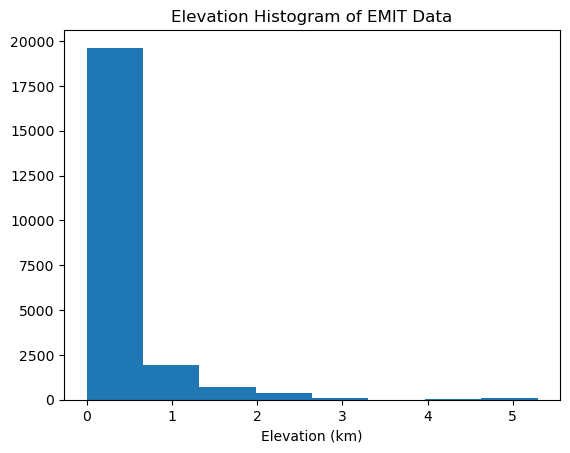

In [39]:
n, bins, patches = plt.hist(elev, bins = 8)
print(bins)
print(n)
plt.title('Elevation Histogram of EMIT Data')
plt.xlabel('Elevation (km)')

[ 0.22  8.76 17.3  25.84 34.38 42.92 51.46 60.   68.54]
[ 761. 1958. 3243. 4655. 5505. 3735. 2722.  307.]


Text(0.5, 0, 'Zenith (deg)')

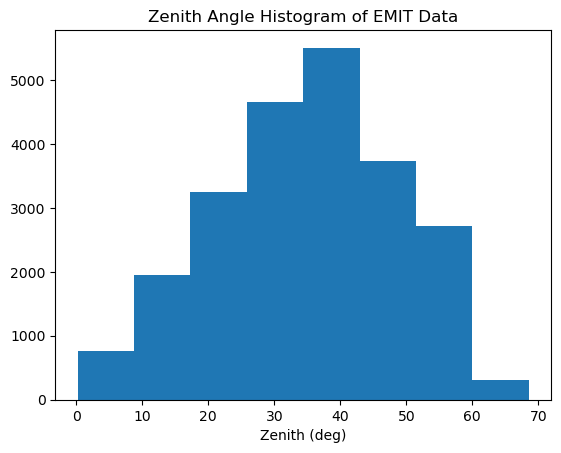

In [40]:
n, bins, patches = plt.hist(zen, bins = 8)
print(bins)
print(n)
plt.title('Zenith Angle Histogram of EMIT Data')
plt.xlabel('Zenith (deg)')

[ 0.       4.12375  8.2475  12.37125 16.495   20.61875 24.7425  28.86625
 32.99   ]
[15737.  4627.  1425.   613.   270.   119.    63.    32.]


Text(0.5, 0, 'Slope')

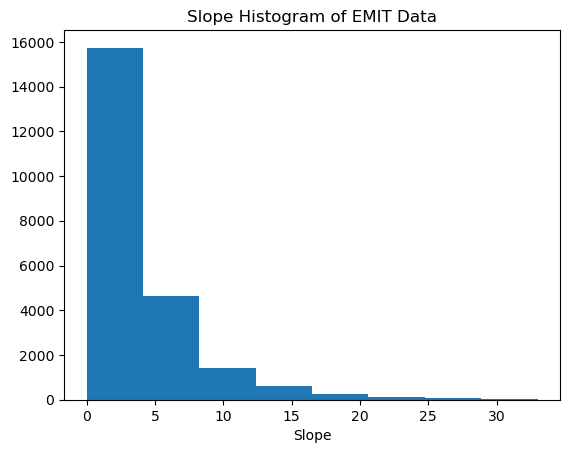

In [41]:
n, bins, patches = plt.hist(slope, bins = 8)
print(bins)
print(n)
plt.title('Slope Histogram of EMIT Data')
plt.xlabel('Slope')

[0.    0.735 1.47  2.205 2.94  3.675 4.41  5.145 5.88 ]
[14779.  4593.  1890.   875.   424.   207.    97.    21.]


Text(0.5, 0, 'WV Range (g/cm^2)')

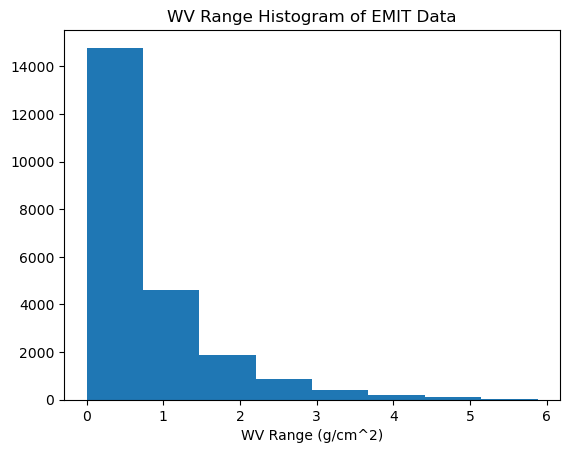

In [42]:
n, bins, patches = plt.hist(WV_range, bins = 8)
print(bins)
print(n)
plt.title('WV Range Histogram of EMIT Data')
plt.xlabel('WV Range (g/cm^2)')

[0.05    0.79375 1.5375  2.28125 3.025   3.76875 4.5125  5.25625 6.     ]
[5470. 8615. 4971. 2179.  958.  456.  156.   81.]


Text(0.5, 0, 'WV Median (g/cm^2)')

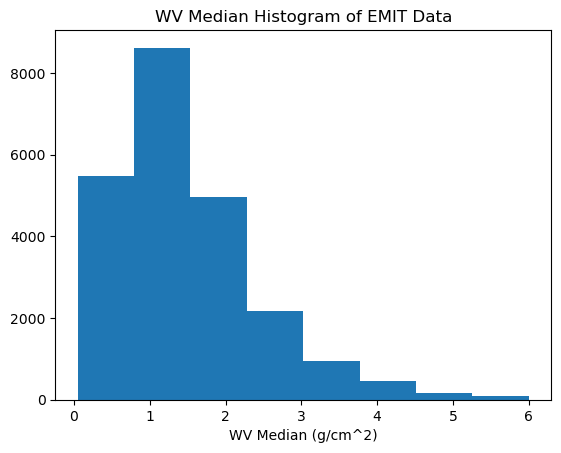

In [43]:
n, bins, patches = plt.hist(WV_med, bins = 8)
print(bins)
print(n)
plt.title('WV Median Histogram of EMIT Data')
plt.xlabel('WV Median (g/cm^2)')

[0.      0.06125 0.1225  0.18375 0.245   0.30625 0.3675  0.42875 0.49   ]
[13403.  2370.  1630.  1299.  1093.  1031.   949.  1111.]


Text(0.5, 0, 'Total Cloud Fraction')

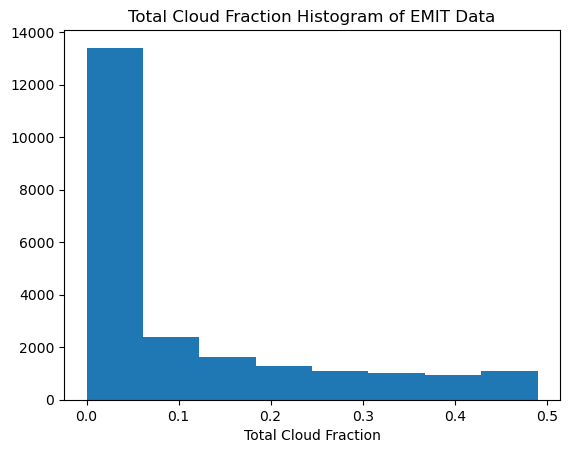

In [45]:
n, bins, patches = plt.hist(total_cloud_frac, bins = 8)
print(bins)
print(n)
plt.title('Total Cloud Fraction Histogram of EMIT Data')
plt.xlabel('Total Cloud Fraction')

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
[15773.  2929.  2283.  1901.  1841.  1692.  2210.  5030.]


Text(0.5, 0, 'Total Cloud Fraction')

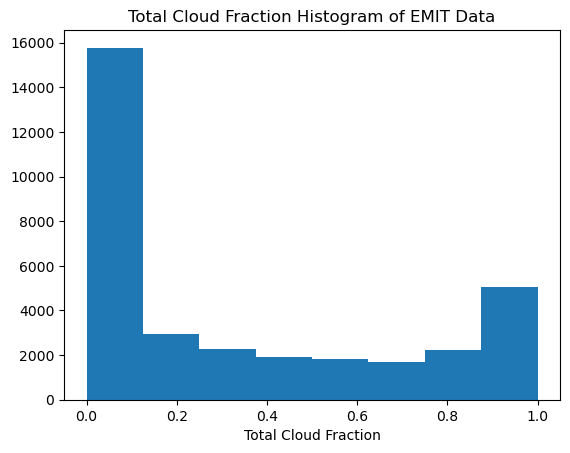

In [47]:
tcf = []
for dict in properties_dict_all:
    if 'Total Cloud Fraction' in dict:
        tcf.append(dict['Total Cloud Fraction'])
n, bins, patches = plt.hist(tcf, bins = 8)
print(bins)
print(n)
plt.title('Total Cloud Fraction Histogram of EMIT Data')
plt.xlabel('Total Cloud Fraction')